# Feature Engineering

In [1]:
import numpy as np
import pandas as pd

In [2]:
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# setting params
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (30, 10),
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}

sns.set_style('whitegrid')
sns.set_context('talk')

## Feature Engineering : Numerical Data

In [4]:
from google.colab import files
uploaded = files.upload()

In [5]:
!pip install --upgrade xlrd

In [6]:
# load dataset
credit_df = pd.read_excel('/content/credit_default.xls', skiprows=1,index_col=0)
credit_df.shape

(30000, 24)

In [8]:
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Extract Raw Features

In [9]:
# Attributes which are useful in their raw form itself
credit_df[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
ID,,,,,,,
1,20000,3913,3102,689,0,0,0
2,120000,2682,1725,2682,3272,3455,3261
3,90000,29239,14027,13559,14331,14948,15549
4,50000,46990,48233,49291,28314,28959,29547
5,50000,8617,5670,35835,20940,19146,19131


### Counts

In [10]:
# Based on requirements, count of events is also a useful attribute.
# utility function
def default_month_count(row):
    count = 0
    for i in [0, 2, 3, 4, 5, 6]:
        if row['PAY_'+str(i)] > 0:
            count += 1
    return count

In [11]:
credit_df['number_of_default_months'] = credit_df.apply(default_month_count, axis=1)

In [12]:
credit_df[['number_of_default_months']].head()

,number_of_default_months
ID,
1,2
2,2
3,0
4,0
5,0


### Binarization

In [13]:
# Occurance or absence of an event is also a useful feature
credit_df['has_ever_defaulted'] = credit_df.number_of_default_months.apply(lambda x: 1 if x>0 else 0)
credit_df[['number_of_default_months', 'has_ever_defaulted']].head()

,number_of_default_months,has_ever_defaulted
ID,,
1,2,1
2,2,1
3,0,0
4,0,0
5,0,0


### Binning

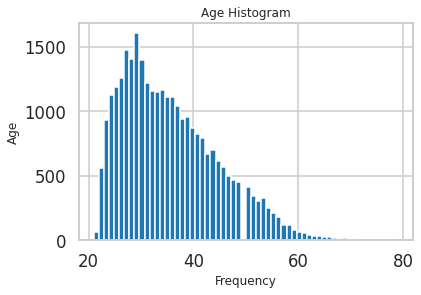

In [16]:
# Also known as quantization, helps in transformin continuous features such as
# age and income onto discrete scales.

credit_df.AGE.plot(kind='hist', bins=60)
plt.title('Age Histogram', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
plt.show()

In [17]:
# Assign a bin label to each row
credit_df['age_bin_fixed'] = credit_df.AGE.apply(lambda age: np.floor(age/10.))

In [18]:
credit_df[['AGE', 'age_bin_fixed']].head()

,AGE,age_bin_fixed
ID,,
1,24,2.0
2,26,2.0
3,34,3.0
4,37,3.0
5,57,5.0


#### Quantile Based Binning

In [19]:
# Quantile binning
quantile_list = [0, .25, .5, .75, 1.]
quantiles = credit_df.AGE.quantile(quantile_list)
quantiles

0.00    21.0
0.25    28.0
0.50    34.0
0.75    41.0
1.00    79.0
Name: AGE, dtype: float64

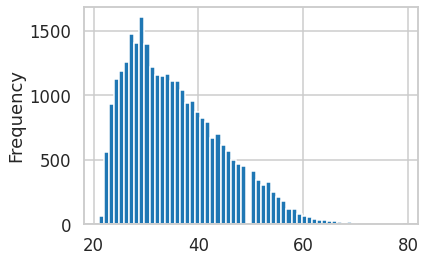

In [23]:
# Plot Quartile Ranges on the Distribution

fig, ax = plt.subplots()
a = credit_df.AGE.plot(kind='hist', bins=60)

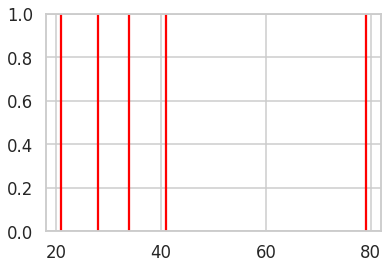

In [33]:
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
b = ax.legend([qvl], ['Quantiles'], fontsize=10)

In [34]:
ax.set_title('Age Histogram with Quantiles', fontsize=12)

Text(0.5, 1.0, 'Age Histogram with Quantiles')

In [35]:
ax.set_xlabel('Age', fontsize=12)


Text(0.5, 3.200000000000003, 'Age')

In [36]:
ax.set_ylabel('Frequency', fontsize=12)

Text(25.200000000000003, 0.5, 'Frequency')

In [38]:
# Assign Quartile Bin Labels
quantile_labels = ['Q1', 'Q2', 'Q3', 'Q4']
credit_df['age_quantile_range'] = pd.qcut(credit_df['AGE'], q=quantile_list)
credit_df['age_quantile_label'] = pd.qcut(credit_df['AGE'], q=quantile_list, labels=quantile_labels)

In [39]:
credit_df[['AGE', 'age_quantile_range', 'age_quantile_label']].head()

,AGE,age_quantile_range,age_quantile_label
ID,,,
1,24,"(20.999, 28.0]",Q1
2,26,"(20.999, 28.0]",Q1
3,34,"(28.0, 34.0]",Q2
4,37,"(34.0, 41.0]",Q3
5,57,"(41.0, 79.0]",Q4


## Feature Engineering : Categorical Data

In [40]:
# We have utilized multiple publicly available datasets to better understand categorical attributes
battles_df = pd.read_csv('/content/battles.csv')
battles_df.shape

(38, 25)

In [41]:
battles_df[['name', 'year', 'attacker_king', 'attacker_1']].head()

,name,year,attacker_king,attacker_1
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Lannister
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Lannister
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Lannister
3,Battle of the Green Fork,298,Robb Stark,Stark
4,Battle of the Whispering Wood,298,Robb Stark,Stark


### Transforming Nominal Features

In [44]:
# Categorical attributes which do not have any intrinsic ordering amongst them
from sklearn.preprocessing import LabelEncoder

attacker_le = LabelEncoder()
attacker_labels = attacker_le.fit_transform(battles_df.attacker_1)
attacker_mappings = {index: label for index, label in enumerate(attacker_le.classes_)}
attacker_mappings

{0: 'Baratheon',
 1: 'Bolton',
 2: 'Bracken',
 3: 'Brave Companions',
 4: 'Brotherhood without Banners',
 5: 'Darry',
 6: 'Free folk',
 7: 'Frey',
 8: 'Greyjoy',
 9: 'Lannister',
 10: 'Stark'}

In [45]:
# assign labels
battles_df['attacker1_label'] = attacker_labels
battles_df[['name', 'year', 'attacker_king', 'attacker_1', 'attacker1_label']].head()

,name,year,attacker_king,attacker_1,attacker1_label
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Lannister,9
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Lannister,9
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Lannister,9
3,Battle of the Green Fork,298,Robb Stark,Stark,10
4,Battle of the Whispering Wood,298,Robb Stark,Stark,10


### Transforming Ordinal Features

In [46]:
# Categorical attributes which have an intrinsic ordering amonst them
sales_df = pd.DataFrame(data={
    'items_sold':abs(np.random.randn(7)*100),
    'day_of_week':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
})
sales_df

,items_sold,day_of_week
0,28.733231,Monday
1,13.793742,Tuesday
2,77.034051,Wednesday
3,38.617467,Thursday
4,71.044836,Friday
5,72.308917,Saturday
6,50.708432,Sunday


In [47]:
day_map = {
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
}

In [48]:
sales_df['weekday_label'] = sales_df['day_of_week'].map(day_map)
sales_df.head()

,items_sold,day_of_week,weekday_label
0,28.733231,Monday,1
1,13.793742,Tuesday,2
2,77.034051,Wednesday,3
3,38.617467,Thursday,4
4,71.044836,Friday,5


### Encoding Categoricals

In [49]:
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

day_le = LabelEncoder()
day_labels = day_le.fit_transform(sales_df['day_of_week'])
sales_df['label_encoder_day_label'] = day_labels

In [50]:
# encode day labels using one-hot encoding scheme
day_ohe = OneHotEncoder()
day_feature_arr = day_ohe.fit_transform(sales_df[['label_encoder_day_label']]).toarray()
day_feature_labels = list(day_le.classes_)
day_features = pd.DataFrame(day_feature_arr, columns=day_feature_labels)

In [51]:
sales_ohe_df = pd.concat([sales_df, day_features], axis=1)
sales_ohe_df

,items_sold,day_of_week,weekday_label,label_encoder_day_label,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,28.733231,Monday,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,13.793742,Tuesday,2,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,77.034051,Wednesday,3,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,38.617467,Thursday,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,71.044836,Friday,5,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,72.308917,Saturday,6,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,50.708432,Sunday,7,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
# Dummy Encoder
day_dummy_features = pd.get_dummies(sales_df['day_of_week'], drop_first=True) 
pd.concat([sales_df[['day_of_week', 'items_sold']], day_dummy_features], axis=1)

,day_of_week,items_sold,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Monday,28.733231,1,0,0,0,0,0
1,Tuesday,13.793742,0,0,0,0,1,0
2,Wednesday,77.034051,0,0,0,0,0,1
3,Thursday,38.617467,0,0,0,1,0,0
4,Friday,71.044836,0,0,0,0,0,0
5,Saturday,72.308917,0,1,0,0,0,0
6,Sunday,50.708432,0,0,1,0,0,0
